# Laboratorio No. 5 - Modelación y Simulación

### Task No. 3

Manuel Rodas - 21509 / Jose Santisteban - 21153 / Sebastian Solorzano - 21826

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definir la función de distribución de probabilidad 
def target_pmf(x):
    return (x**2) / 55

In [3]:
# Definir la distribución de propuesta
def proposal_pmf(x, k):
    return 1 / k


In [4]:
def calculate_c(target_pmf, proposal_pmf, x_values):
    return max(target_pmf(x) / proposal_pmf(x, len(x_values)) for x in x_values)

In [5]:
# Implementar el método de aceptación-rechazo
def acceptance_rejection(target_pmf, proposal_pmf, c, x_values, n_samples):
    samples = []
    while len(samples) < n_samples:
        x_proposed = np.random.choice(x_values) 
        u = np.random.uniform(0, 1) 
        if u < target_pmf(x_proposed) / (c * proposal_pmf(x_proposed, len(x_values))):
            samples.append(x_proposed)
    return samples

In [6]:
x_values = np.arange(1, 11)

In [7]:
c = calculate_c(target_pmf, proposal_pmf, x_values)

In [8]:
n_samples = 1000 # MUestra aleatorio de 1000 puntos
samples = acceptance_rejection(target_pmf, proposal_pmf, c, x_values, n_samples)

In [9]:
# Calcular el histograma de la muestra generada
sample_counts = np.bincount(samples)[1:]
sample_probabilities = sample_counts / n_samples

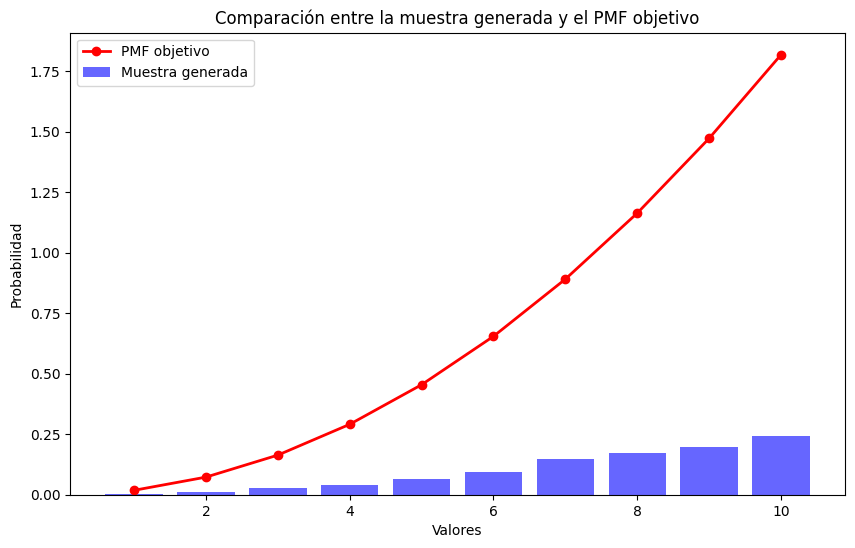

In [10]:
# Imprimir histograma
plt.figure(figsize=(10, 6))
plt.bar(x_values, sample_probabilities, alpha=0.6, label='Muestra generada', color='blue')
plt.plot(x_values, [target_pmf(x) for x in x_values], 'ro-', label='PMF objetivo', linewidth=2)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Comparación entre la muestra generada y el PMF objetivo')
plt.legend()
plt.show()